# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [1]:
# Load pickled data
import pickle

# TODO: fill this in based on where you saved the training and testing data
training_file = '/Users/Knock/Desktop/github/selfdrive-udacity/traffic-signs-data/train.p'
testing_file = '/Users/Knock/Desktop/github/selfdrive-udacity/traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
### To start off let's do a basic data summary.

# TODO: number of training examples
n_train = len(X_train)

# TODO: number of testing examples
n_test = len(X_test)

# TODO: what's the shape of an image?
image_shape = X_train[0].shape

# TODO: how many classes are in the dataset
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


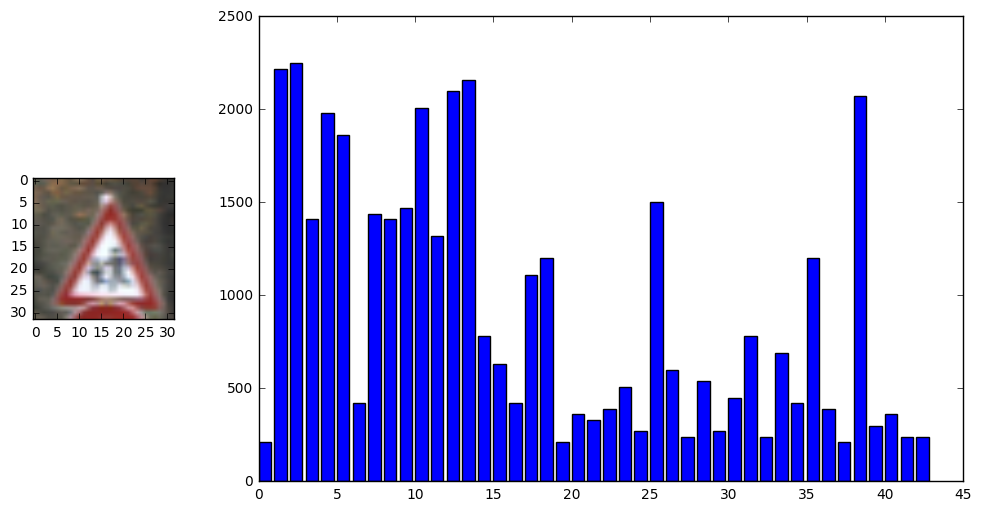

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
%matplotlib inline
import numpy as np
import scipy.misc as smp
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from collections import Counter
from matplotlib import gridspec

fig = plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 5]) 
a=fig.add_subplot(gs[0])

image_arr = np.asarray(X_train[31030], dtype=np.uint8)
img = smp.toimage(image_arr)       
imgplot = plt.imshow(img)

class_dict = dict(Counter(y_train))

a=fig.add_subplot(gs[1])

plt.bar(range(len(class_dict)), class_dict.values(), align='edge')
# plt.xticks(range(len(class_dict)), list(class_dict.keys()))

plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

[[ 1.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  0.  0. ...,  0.  0.  1.]]


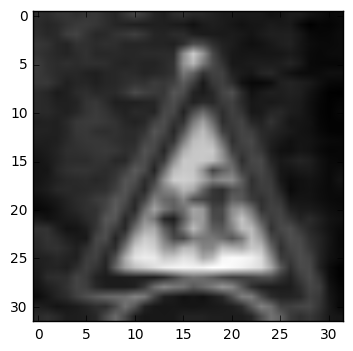

(39209, 32, 32)
(39209, 32, 32, 1)
(12630, 32, 32, 1)


In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
from sklearn.preprocessing import LabelBinarizer

def convert_to_grayscale(img):
    return np.mean(img, axis=3)

def normalize(img):
    
    # Data around origin
    img -= np.mean(img)
    
    # Normalization
    img /= np.std(img, axis = 0)
    
    return img

def one_hot_encode(labels):
    enc = LabelBinarizer()
    return enc.fit_transform(labels).astype(np.float32) 
    

# Processing features
X_train_processed = normalize(convert_to_grayscale(X_train))
X_test_processed = normalize(convert_to_grayscale(X_test))

# Processing label
y_train_processed = one_hot_encode(y_train)
y_test_processed = one_hot_encode(y_test)
# print(y_train)

print(one_hot_encode(y_train))
plt.imshow(X_train_processed[31030], cmap='gray')
plt.show()

print(X_train_processed.shape)


def reshape_image(data, image_shape, num_channels=1):
    # reshape the image for convolution
    return data.reshape(-1, image_shape[0], image_shape[1], 1).astype(np.float32)

X_train_reshape = reshape_image(X_train_processed, image_shape, 1)
X_test_reshape = reshape_image(X_test_processed, image_shape, 1)

print(X_train_reshape.shape)
print(X_test_reshape.shape)

### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**

- First I converted the images to grayscale by simply taking mean of the data. It will make our computations faster as we don't need to apply calculations on all the 3 channels.
- Then I normalized the image pixels by subtracting the mean so that they are around origin and then dividing by standard deviation so that they are on same scale.
- I encoded labes using one hot encoding so that it is easy and possible to classify a multiscale classifier.

In [5]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train_reshape, y_train_processed, test_size=0.33, stratify=y_train_processed)
print(X_train.shape)
print(X_validate.shape)
print(y_train.shape)

(26270, 32, 32, 1)
(12939, 32, 32, 1)
(26270, 43)


### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**
- I used to sklean.model_selection's train_test_split function to generate training and validation set. I used 1/3rd of data as validation and rest as training
- We already have the test data with us so I didn't need an extra test set
- I didn't generate additional data as of now

In [29]:
n_channels = 1

# Conv Layer 1
layer_1_filter_size = 5
layer_1_num_filter = 16

# Conv Layer 2
layer_2_filter_size = 5
layer_2_num_filter = 36

keep_prob = 0.5

# Size of the fully connected layer
fully_conn_size = 128

def get_weights(shape):
    return tf.Variable(tf.truncated_normal(shape))

def get_biases(num_filter):
    return tf.Variable(tf.zeros(num_filter))

def get_conv_layer(inputs, weights, biases, max_pool=True):
    strides = [1, 1, 1, 1]
    padding = 'SAME'
    x = tf.nn.conv2d(inputs, weights, strides, padding) + biases
    
    if(max_pool):
        ksize = [1, 2 ,2 ,1]
        strides = [1, 2, 2, 1]
        padding = 'SAME'
        x = tf.nn.max_pool(x, ksize, strides, padding)
        
    return tf.nn.relu(x)

In [30]:
def convert_conv_output_to_fc_input(layer):
    """
        Takes as input the output from a convolutional layer
        And flattens it to be used as input to a fully connected later
    """
    layer_shape = layer.get_shape()
    
    num_features = layer_shape[1:4].num_elements()
    
    layer_flat = tf.reshape(layer, [-1, num_features])
    
    return layer_flat, num_features

In [31]:
def get_fully_connected_layer(input_layer, weights, biases, use_RELU=True, train=False):
    print(input_layer)
    print(weights)
    output = tf.matmul(input_layer, weights) + biases
    
    if(train):
        output = tf.nn.dropout(output, keep_prob=keep_prob)
        
    if(use_RELU):
        output = tf.nn.relu(output)
    
    return output

In [32]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten



layer_1_weights = get_weights([layer_1_filter_size, layer_1_filter_size, n_channels, layer_1_num_filter])
layer_1_biases = get_biases(layer_1_num_filter)

layer_2_weights = get_weights([layer_2_filter_size, layer_2_filter_size, layer_1_num_filter, layer_2_num_filter])
layer_2_biases = get_biases(layer_2_num_filter)

flattened_layer_size = int(image_shape[0]//4) * int(image_shape[0]//4) * layer_2_num_filter
weights_fully_conn_layer_1 = get_weights([flattened_layer_size, fully_conn_size])
biases_fully_conn_layer_1 = get_biases(fully_conn_size)

weights_fully_conn_layer_2 = get_weights([fully_conn_size, n_classes])
biases_fully_conn_layer_2 = get_biases(n_classes)


# LeNet architecture:
# INPUT -> CONV -> ACT -> POOL -> CONV -> ACT -> POOL -> FLATTEN -> FC -> ACT -> FC
#
# Don't worry about anything else in the file too much, all you have to do is
# create the LeNet and return the result of the last fully connected layer.
def LeNet(x):
    # Reshape from 2D to 4D. This prepares the data for
    # convolutional and pooling layers.

    # TODO: Define the LeNet architecture.

    # Convolutional Layer
    layer_1_conv_layer = get_conv_layer(x, layer_1_weights, layer_1_biases, max_pool=True)
    
    # Convolutional layer
    layer_2_conv_layer = get_conv_layer(layer_1_conv_layer, layer_2_weights, layer_2_biases, max_pool=True)
    
    layer_flat,num_features = convert_conv_output_to_fc_input(layer_2_conv_layer)

    fully_connected_layer_1_output = get_fully_connected_layer(layer_flat, weights_fully_conn_layer_1, biases_fully_conn_layer_1, train=train)
    
    fully_connected_layer_2_output = get_fully_connected_layer(fully_connected_layer_1_output, weights_fully_conn_layer_2, biases_fully_conn_layer_2, use_RELU=False)

    # Flatten layer
#     layer_flatten = flatten(layer_2_conv_layer)

#     # Fully connected layer
#     layer_fully_connected_1 = tf.contrib.layers.fully_connected(layer_flatten, 128)

#     # Activation layer
#     layer_fully_connected_1 = tf.nn.relu(layer_fully_connected_1)

#     # Fully connected layer
#     layer_fully_connected_2 = tf.contrib.layers.fully_connected(layer_fully_connected_1, n_classes)

    # Return the result of the last fully connected layer.
    return fully_connected_layer_2_output

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [33]:
### Train your model here.
### Feel free to use as many code cells as needed.

BATCH_SIZE = 128


beta = 1e-4

x = tf.placeholder(tf.float32, shape=[None, image_shape[0], image_shape[1], n_channels])
# Classify 43 classes.
y = tf.placeholder(tf.float32, shape=[None, n_classes])

x_valid = tf.constant(X_validate)
x_test = tf.constant(X_test)

fc2 = LeNet(x)

loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(fc2, y)) + beta*(tf.nn.l2_loss(layer_1_weights) + tf.nn.l2_loss(layer_2_weights) + tf.nn.l2_loss(weights_fully_conn_layer_1) + tf.nn.l2_loss(weights_fully_conn_layer_2))
opt = tf.train.AdamOptimizer(1e-3)
train_op = opt.minimize(loss_op)
# correct_prediction = tf.equal(tf.argmax(fc2, 1), tf.argmax(y, 1))
# accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


y_pred = tf.nn.softmax(fc2)

valid_pred = tf.nn.softmax(LeNet(x_valid))
test_pred = tf.nn.softmax(LeNet(X_test_reshape))

Tensor("Reshape_5:0", shape=(?, 2304), dtype=float32)
Tensor("Relu_12:0", shape=(?, 128), dtype=float32)
Tensor("Reshape_9:0", shape=(12939, 2304), dtype=float32)
Tensor("Relu_15:0", shape=(12939, 128), dtype=float32)
Tensor("Reshape_10:0", shape=(12630, 2304), dtype=float32)
Tensor("Relu_18:0", shape=(12630, 128), dtype=float32)


In [34]:
def data_iterator(x, y):
    """ A simple data iterator """
    while True:
        # shuffle labels and features
        idxs = np.arange(0, len(x))
        np.random.shuffle(idxs)
        shuf_features = x[idxs]
        shuf_labels = y[idxs]
        batch_size = BATCH_SIZE
        for batch_idx in range(0, len(x), batch_size):
            images_batch = shuf_features[batch_idx:batch_idx+batch_size]
            labels_batch = shuf_labels[batch_idx:batch_idx+batch_size]
            yield images_batch, labels_batch


In [35]:
def accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

In [ ]:
import math

EPOCH = 100
session = tf.Session()
session.run(tf.initialize_all_variables())

num_iterations_per_epoch = math.ceil(X_train.shape[0]/BATCH_SIZE)

iter_ = data_iterator(X_train, y_train)

for i in range(EPOCH):

    for j in range(num_iterations_per_epoch):
        # get a batch of data
        x_batch, y_batch = next(iter_)

        # Run the optimizer on the batch
        a = {x: x_batch, y: y_batch}
        session.run([train_op], feed_dict=a)

    a = {x: X_train, y: y_train}
    train_cost, train_predictions = session.run([loss_op, y_pred], feed_dict=a)
    print("train accuracy %.1f%% with loss %0.1f in epoch %d" % (float(accuracy(train_predictions, y_train)), train_cost, i))
    
print('Validation accuracy: %.1f%%' % accuracy(valid_pred.eval(session=session), y_validate))        
print('Test accuracy: %.1f%%' % accuracy(test_pred.eval(session=session), y_test_processed))

train accuracy 5.9% with loss 92.1 in epoch 0


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset?_


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.